#**l2. Основы теории вероятности**

## Симуляция случайной величины

In [ ]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека дл работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.api import qqplot


import ssl
ssl._create_default_https_context = ssl._create_unverified_context

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline

### 1. Генерация случайных величин в python


Иногда для решения задач по теории вероятностей или исследования свойств статистических алгоритмов нужно сгенерировать случайную выборку из какого-нибудь распределения. Чтобы сгенерировать в `python` любую случайную величину, нужно сделать две вещи: 

* Создать генератор. 

Внутри пакета `scipy.stats` есть [много разных распределений.](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) Среди всего этого обилия нужно найти нужное распределение и задать его параметры. Давайте сделаем это  на примере **нормального распределения**, $X \sim N(\mu, \sigma^2)$. Того самого распределения, плотность которого выглядит как: 

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} \cdot  e^{-\frac{(x - \mu)^2}{2 \sigma^2}}
$$


Параметр ```loc``` задаёт $\mu$, ```scale``` — среднеквадратичное отклонение $\sigma$.

In [ ]:
norm_rv = stats.norm(loc=0, scale=1)  # задали генератор 

Когда конкретный генератор готов, у него можно вызывать разные методы: 

* `rvs` сгенерирует нам выборку из распределения объёма `size`
* `cdf` вычислит для нас значение функции распределения (cumulative distribution function) в указанной точке
* `pdf` вычислит значение плотности распредеелния (probability density function) в указанной точке 
* `ppf` вычислит квантиль, указанного уровня

[В документации](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) можно найти и другие методы, но мы с ними практически не будем встречаться в течение нашего курса (см. разел statistical functions).

In [ ]:
sample = norm_rv.rvs(1000)  # сгенерируем 1000 значений
sample[:10]

array([ 1.91933475,  0.9757462 ,  1.11675728,  1.39352164, -0.474373  ,
       -0.45046996, -2.11142536,  1.26187534, -0.50100774,  0.55768854])

In [ ]:
sample.shape

(1000,)

In [ ]:
(sample*6).mean()

-0.12059178113505532

In [ ]:
sample.mean()*6

-0.12059178113505528

In [ ]:
(sample*6).var()

33.04172717063343

In [ ]:
36*sample.var()

33.04172717063343

In [ ]:
np.array([20]).var()

0.0

### 2. Плотность и функция распределения


Теперь мы можем немного поэкспериментировать с нашей случайной величиной. Например, __мы можем узнать $f(1)$__.

In [ ]:
norm_rv.pdf(1)

0.24197072451914337

Можем построить картинку для плотности распределения, $f(x)$. 

In [ ]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

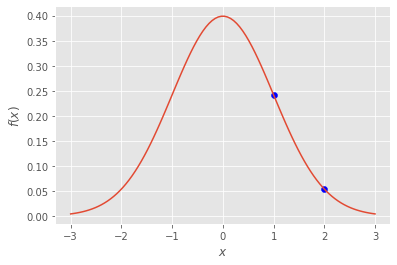

In [ ]:
plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(1)
plt.scatter([1,2], 
            [norm_rv.pdf(1), norm_rv.pdf(2)], color="blue");

Теперь узнаем значение функции распределения в точке $1$: $$F(1) = P(X \le 1) = \int_{-\infty}^1 f(x)dx$$

In [ ]:
norm_rv.cdf(1)

0.8413447460685429

На плотности распределения это выглядит как площадь до точки $1$, то есть вероятность того, что $X \le 1$.

0.8413447460685429


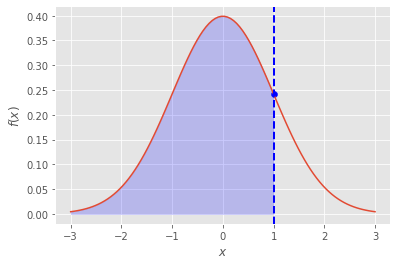

In [ ]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(1)
plt.scatter([x_], [norm_rv.pdf(x_)], color="blue");

# на ту же картинку добавили новую часть, штриховку
xq = np.linspace(-3, 1, 100)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(x_, color='blue', linestyle="--", lw=2);

print(norm_rv.cdf(x_))

In [ ]:
# правило 3 сигм
for x in [1,2,3]:
    print(f'P({-x} <X< {x}) = ',norm_rv.cdf(x)-norm_rv.cdf(-x))

P(-1 <X< 1) =  0.6826894921370859
P(-2 <X< 2) =  0.9544997361036416
P(-3 <X< 3) =  0.9973002039367398


Можем построить картинку для функции распределения.

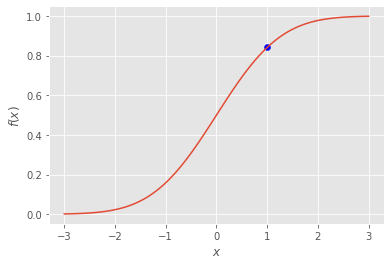

In [ ]:
x = np.linspace(-3, 3, 100)
cdf = norm_rv.cdf(x)

plt.plot(x, cdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем F(1)
plt.scatter([x_], [norm_rv.cdf(x_)], color="blue");

А теперь найдём ещё одну вероятность:

$$ P(1 < X < 3) = \int_1^3 f(x) dx = F(3) - F(1)$$

In [ ]:
norm_rv.cdf(3) - norm_rv.cdf(1)

0.15730535589982697

Это уже вероятность попасть в конкретный отрезок, изобразим её на плотности распределения. 

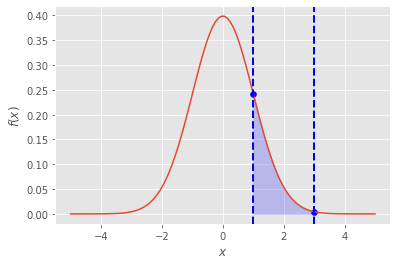

In [ ]:
x = np.linspace(-5, 5, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(1)
plt.scatter([1, 3], [norm_rv.pdf(1), norm_rv.pdf(3)], color="blue");

# на ту же картинку добавили новую часть, штриховку
xq = np.linspace(1, 3)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(1, color='blue', linestyle="--", lw=2)
plt.axvline(3, color='blue', linestyle="--", lw=2);

Для полноты картины осталось только найти какой-нибудь квантиль. Квантиль уровня $\gamma$ это такое число $q$, что 

$$P(X \le q) = \gamma$$

Найдём $5\%$ и нарисуем его на картинке с плотностью:

2.3263478740408408


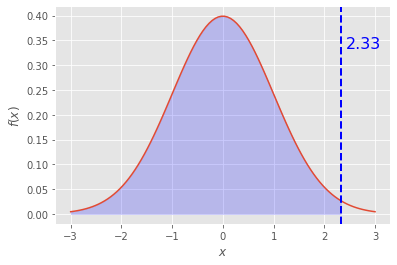

In [ ]:
q = norm_rv.ppf(0.99)
# q = norm_rv.ppf(0.25)  # квартиили - это квантили уровня 0.25 и 0.75
# q = norm_rv.ppf(0.5)  # медиана - квантиль 0.50
print(q)

x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

xq = np.linspace(-3, q)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(q, color='blue', linestyle="--", lw=2)

y_max = plt.ylim()[1]
plt.text(q + 0.1, 0.8*y_max, round(q,2), color='blue', fontsize=16);

Обратите внимание, что всё, что мы сейчас делали - мы делали с теоретическим распределением. По аналогии можно работать с любым другим распределением. Например, с экспоненциальным: 

In [ ]:
exp_rv = stats.expon(scale=5)
exp_rv.rvs(5)

array([9.07757671, 7.82232057, 9.45014196, 2.85917375, 5.59671544])

### 3. Взаимосвязи в данных

Будем использовать небольшой набор данных по тому, как люди платят чаевые. 

In [ ]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


__Посмотрим как между собой ваимосвязаны счёт, чаевые и пол клиента.__ 

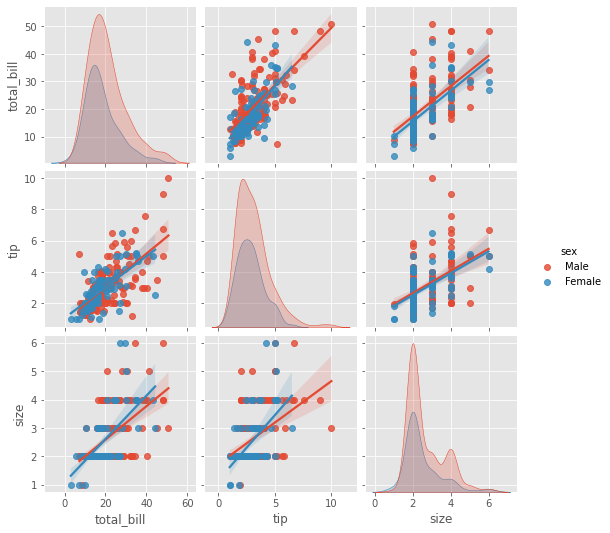

In [ ]:
sns.pairplot(df, hue='sex', height=2.5, kind='reg'); #kind = 'reg'

- Видно, что общий счёт и величина чаевых зависят друг от друга: чем больше счёт, тем больше чаевых оставляют
- Пол никак не влияет на то, какое количество чаевых оставлено, красные и синие точки на графиках распределены равномерно, плотности на диагонали выглядят похожим образом. 

__Посмотрим на разбиение по дням недели.__

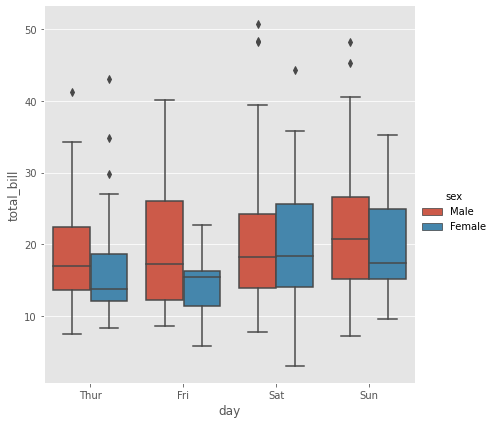

In [ ]:
sns.catplot(x="day", y="total_bill", hue="sex", data=df, kind="box", height=6);

- Почему-то в пятницу мужчины платят больше чаевых, чем женщины. Возможно, что это как-то связано с пятничными свиданиями и с древней традицией: счёт оплачивает мужчина. Но правда ли это так?

__Давайтте посмотрим сколько наблюдений приходится на какой день недели.__ 

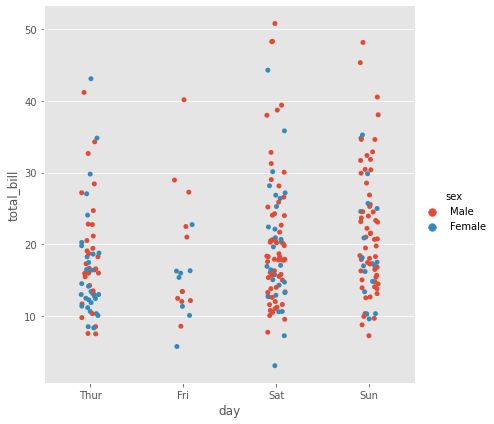

In [ ]:
sns.catplot(x="day", y="total_bill", hue="sex", data=df, height=6);

- Более подробный взгляд на данные показывает, что это связано не с тем, что счёт оплачивает мужчина, а с тем, что в выборке мало данных с пятницы. Из-за этого мы видим такую разницу между чаевыми. 
- В будущем мы будем говорить про статистические тесты. Они будут помогать нам отличать случайную разницу, как в этом примере, от настоящей. 

#### Корреляции

__Можно посмотреть на взаимосвязь только двух переменных.__

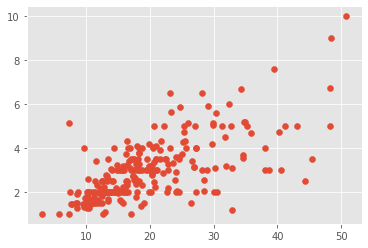

In [ ]:
plt.scatter(df['total_bill'], df['tip']);

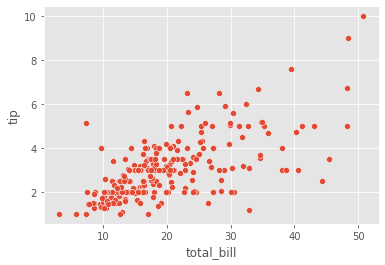

In [ ]:
sns.scatterplot(x="total_bill", y="tip", data=df);

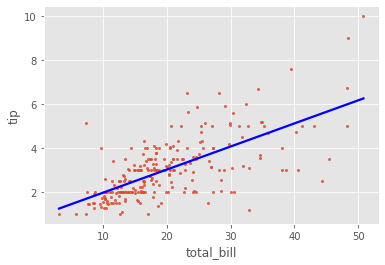

In [ ]:
sns.regplot(x="total_bill", y="tip", data=df, 
            line_kws={'color':'blue'},
            scatter_kws={'s':4},
            ci=None
           );

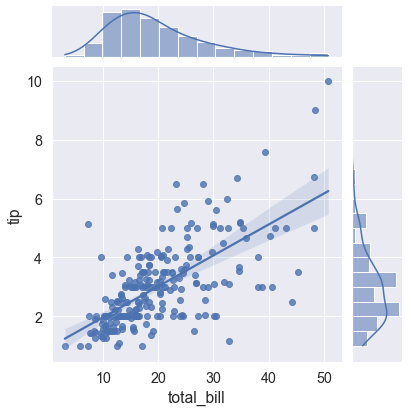

In [ ]:
sns.jointplot(x="total_bill", y="tip", data=df, kind='reg');

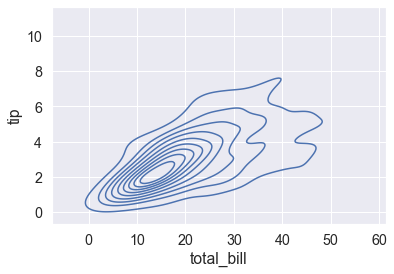

In [ ]:
sns.kdeplot(x="total_bill", y="tip", data=df, 
           );

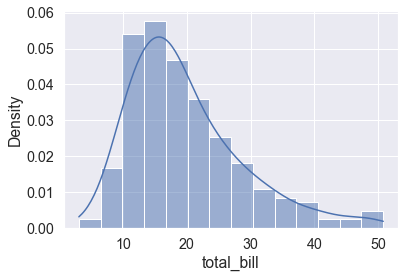

In [ ]:
sns.histplot(data=df, x='total_bill', kde=True, stat='density');

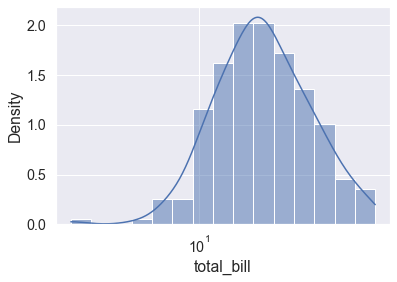

In [ ]:
sns.histplot(data=df, x='total_bill', kde=True, stat='density', log_scale=True);

In [ ]:
from sklearn.preprocessing import power_transform

<AxesSubplot:ylabel='Count'>

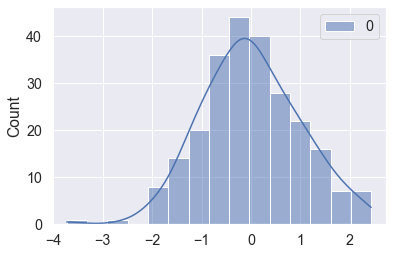

In [ ]:
sns.histplot(power_transform(df[['total_bill']]), kde=True)

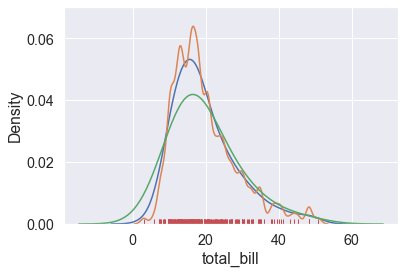

In [ ]:
sns.kdeplot(data=df, x='total_bill');
sns.kdeplot(data=df, x='total_bill', bw_adjust=0.3);
sns.kdeplot(data=df, x='total_bill', bw_adjust=2);
sns.rugplot(data=df, x='total_bill');

- Снова видим, что чем больше общий счёт, тем большую сумму оставляют в качестве чаевых. Хочется провести сквозь точки линию регрессии. 

__Посмотрим на ковариационную матрицу.__

In [ ]:
df.corr()#method='pearson')

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [ ]:
df.corr(method='spearman')

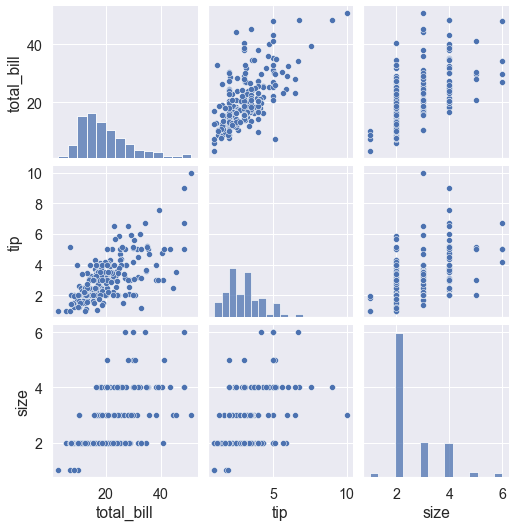

In [ ]:
sns.pairplot(df, kind='scatter', );

Можно визуализировать матрицу с помощью тепловой карты. 

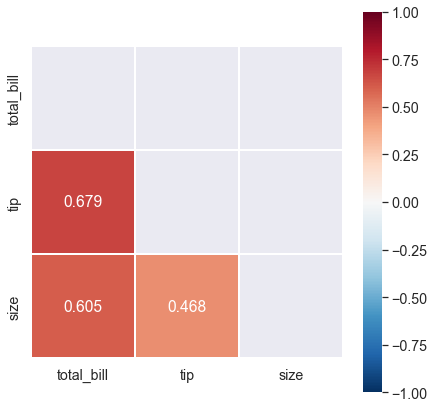

In [ ]:
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))


sns.set(font_scale=1.3)
plt.subplots(figsize=(7, 7))

sns.heatmap(corr, mask=mask, 
            square=True,
            annot=True, fmt=".3f", 
            linewidths=0.2, cmap="RdBu_r",
            vmin=-1, vmax=1, center=0
           );

- Видно, что корреляция Спирмэна и Пирсона не сильно отличаются друг от друга в нашем примере. Это связано с тем, что взаимосвязи в данных линейные. 

__Пример с рангами из презентации:__

Корреляция Спирмэна - это корреляция Пирсона, которую посчитали между рангами. 

In [ ]:
x = np.array([10, 8, 6, 7, 4, 10, 9, 5])
y = np.array([9, 9, 4, 5, 6, 8, 10, 7])

stats.spearmanr(x, y).correlation

In [ ]:
rx = np.array([7.5, 5, 3, 4, 1, 7.5, 6, 2])
ry = np.array([6.5, 6.5, 1, 2, 3, 5, 8, 4])

stats.pearsonr(rx, ry)[0]

0.6445783132530122

pearsonr 0.8410051235920655
spearmanr 0.9019261926192619


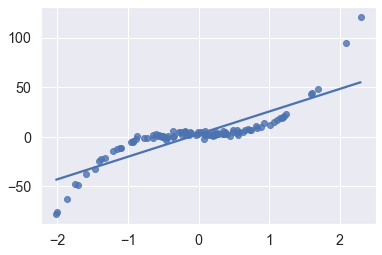

In [ ]:
scale = 2

x = stats.norm().rvs(100)
eps = stats.norm(0, scale).rvs(100)
y = 10*x**3 + 3 + eps

sns.regplot(x=x, y=y, ci=None)

print('pearsonr', stats.pearsonr(x,y)[0])
print('spearmanr', stats.spearmanr(x,y)[0])


### 4. Стандартизация

In [ ]:
x = df['total_bill']

x.mean(), x.std()

In [ ]:
z = (x-x.mean())/x.std()

# стандартизация
z.mean(), z.std()

### 5. Кодирование категориальных переменных

In [ ]:
pd.get_dummies(df, drop_first=True)

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,1,0,1
240,27.18,2.00,2,1,0,0,1,0,1
241,22.67,2.00,2,0,0,0,1,0,1
242,17.82,1.75,2,0,1,0,1,0,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

cat_cols = ['sex','smoker','day','time']
X = ohe.fit_transform(df[cat_cols])


In [ ]:
X.toarray().shape

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
cat_cols = ['sex','smoker','day','time']
X = ord_enc.fit_transform(df[cat_cols])

In [ ]:
ord_enc.categories_

In [ ]:
df['day']

In [ ]:
df['day'].map({'Fri':0, 'Sat':1, 'Sun':2, 'Thur':3})